# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

# Описание данных

<b>Признаки</b>  
* DateCrawled — дата скачивания анкеты из базы
* VehicleType — тип автомобильного кузова
* RegistrationYear — год регистрации автомобиля
* Gearbox — тип коробки передач
* Power — мощность (л. с.)
* Model — модель автомобиля
* Kilometer — пробег (км)
* RegistrationMonth — месяц регистрации автомобиля
* FuelType — тип топлива
* Brand — марка автомобиля
* NotRepaired — была машина в ремонте или нет
* DateCreated — дата создания анкеты
* NumberOfPictures — количество фотографий автомобиля
* PostalCode — почтовый индекс владельца анкеты (пользователя)
* LastSeen — дата последней активности пользователя  

<b>Целевой признак</b>
* Price — цена (евро)

## Подготовка данных

- Изучите данные. 
- Заполните пропущенные значения и обработайте аномалии в столбцах. 
- Если среди признаков имеются неинформативные, удалите их.

Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import warnings

In [2]:
# Импорт данных
df = pd.read_csv('/datasets/autos.csv')
display(df.shape)
display(df.info())
display(df.head())
display(df.describe())

(354369, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

None

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


Итак,
1. У нас есть 15 признаков и 1 целевок признак Price 
2. Это задача регрессии
3. Признаки, которые не являются информативными (нужно удалить) :
 - DateCrawled — дата скачивания анкеты из базы
 - DateCreated — дата создания анкеты
 - NumberOfPictures — количество фотографий автомобиля ??
 - PostalCode — почтовый индекс владельца анкеты (пользователя)
 - LastSeen — дата последней активности пользователя  


Удалим эти признаки и продолжим анализ.

### Удаление неинформативных признаков

In [3]:
df = df.drop(['DateCreated','NumberOfPictures','PostalCode','LastSeen','RegistrationMonth'], axis=1)

In [4]:
display(df.shape)
display(df.info())
display(df.head())
display(df.describe())

(354369, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   DateCrawled       354369 non-null  object
 1   Price             354369 non-null  int64 
 2   VehicleType       316879 non-null  object
 3   RegistrationYear  354369 non-null  int64 
 4   Gearbox           334536 non-null  object
 5   Power             354369 non-null  int64 
 6   Model             334664 non-null  object
 7   Kilometer         354369 non-null  int64 
 8   FuelType          321474 non-null  object
 9   Brand             354369 non-null  object
 10  NotRepaired       283215 non-null  object
dtypes: int64(4), object(7)
memory usage: 29.7+ MB


None

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no


,Price,RegistrationYear,Power,Kilometer
count,354369.000000,354369.000000,354369.000000,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535
std,4514.158514,90.227958,189.850405,37905.341530
min,0.000000,1000.000000,0.000000,5000.000000
25%,1050.000000,1999.000000,69.000000,125000.000000
50%,2700.000000,2003.000000,105.000000,150000.000000
75%,6400.000000,2008.000000,143.000000,150000.000000
max,20000.000000,9999.000000,20000.000000,150000.000000


1. У нас осталось 9 информативных признаков и 1 целевой
2. Количество пропущенных значений достаточно много. Посмотрим, можно ли их заполнить, и сделаем это.
3. Но перед этим проверим уникальные значения всех столбцов.
4. По таблице выше можно заметить неадекватный год регистрации - 9999, Слишком высокое значение мощности 20000.

### Уникальные значения столбцов

In [5]:
def valcount(dataframe):
    for col in dataframe.columns:
        print('Unique values of', col)
        print(dataframe[col].unique())
        
valcount(df)

Unique values of DateCrawled
['2016-03-24 11:52:17' '2016-03-24 10:58:45' '2016-03-14 12:52:21' ...
 '2016-03-21 09:50:58' '2016-03-14 17:48:27' '2016-03-19 18:57:12']
Unique values of Price
[  480 18300  9800 ... 12395 18429 10985]
Unique values of VehicleType
[nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']
Unique values of RegistrationYear
[1993 2011 2004 2001 2008 1995 1980 2014 1998 2005 1910 2016 2007 2009
 2002 2018 1997 1990 2017 1981 2003 1994 1991 1984 2006 1999 2012 2010
 2000 1992 2013 1996 1985 1989 2015 1982 1976 1983 1973 1111 1969 1971
 1987 1986 1988 1970 1965 1945 1925 1974 1979 1955 1978 1972 1968 1977
 1961 1960 1966 1975 1963 1964 5000 1954 1958 1967 1959 9999 1956 3200
 1000 1941 8888 1500 2200 4100 1962 1929 1957 1940 3000 2066 1949 2019
 1937 1951 1800 1953 1234 8000 5300 9000 2900 6000 5900 5911 1933 1400
 1950 4000 1948 1952 1200 8500 1932 1255 3700 3800 4800 1942 7000 1935
 1936 6500 1923 2290 2500 1930 1001 9450 1944 1943 1934 1938 168

### Изучение целевого признака

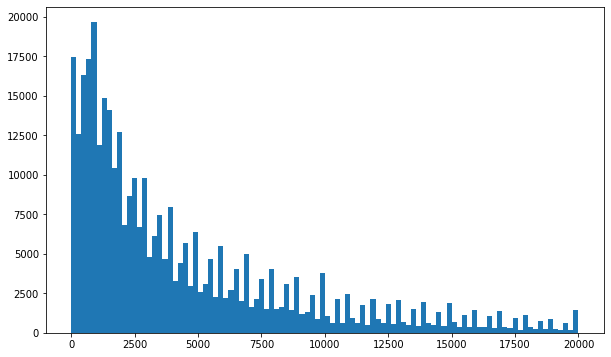

In [6]:
plt.figure(figsize=[10,6])
plt.hist(df.Price, bins=100)
#plt.xlim([0,500])
plt.show()

Распределение целевого признака - цены выглядят не очень реальными,  очень много значений, близких к 0, есть пик цены в почти 20тыс.евро. Думаю, объекты с ценами меньше 200 евро можно точно удалить, ибо похоже, что такого не существует.

In [7]:
df[df['Price']<200].index

Int64Index([     7,     40,     59,     79,     89,    111,    115,    145,
               152,    154,
            ...
            354158, 354175, 354205, 354238, 354248, 354273, 354277, 354309,
            354338, 354364],
           dtype='int64', length=17462)

In [8]:
df = df.drop(df[df['Price']<200].index, axis=0)


<div class="alert alert-block alert-info">
Самое интересное, что на нескольких сайтов по продажам подержанных автомобилей в Германии (страну можно определить по почтовым индексам, большинство из них из Германии) показало, что цены начинаются действительно с 0 и 1 евро, но это единичные объявления и не понятно, то ли это ошибка при заполнении формы, то ли машины на металлолом. Но я  все-таки склоняюсь к тому, чтобы избавиться от таких данных
</div>


In [9]:
df.describe()

,Price,RegistrationYear,Power,Kilometer
count,336907.000000,336907.000000,336907.000000,336907.000000
mean,4643.615119,2003.979947,112.112313,128475.543696
std,4515.337846,67.938601,188.015264,37168.253591
min,200.000000,1000.000000,0.000000,5000.000000
25%,1250.000000,1999.000000,71.000000,125000.000000
50%,2950.000000,2003.000000,105.000000,150000.000000
75%,6650.000000,2008.000000,143.000000,150000.000000
max,20000.000000,9999.000000,20000.000000,150000.000000


***

### Удаление NaN

В VehicleType,Gearbox, Model,FuelType,NotRepaired  - есть NaN, заменить их не удастся, поэтому удаляем:

In [10]:
df.isnull().sum()

DateCrawled             0
Price                   0
VehicleType         31380
RegistrationYear        0
Gearbox             15555
Power                   0
Model               16574
Kilometer               0
FuelType            27214
Brand                   0
NotRepaired         62445
dtype: int64

In [12]:
df.NotRepaired.value_counts()

no     242461
yes     32001
Name: NotRepaired, dtype: int64

***

### Заполнение пропущенных значений

<div class="alert alert-block alert-success">

Стратегии их заполнения на обучении модели и в процессе предсказания на тестовой выборке могут быть разными.<br><br>  На обучении объекты с пропусками в некоторых важных признаках можно и удалить для построения более точной модели (если их малое количество), а на тестировании пропуски следует заполнять, ведь в общем случае мы не можем отказать клиенту в рекомендации, если он не заполнил все сведения об автомобиле (хотя можем и потребовать). <br>  <br> Пропуски в "Model" (модель автомобиля) на обучающей выборке удаляем, на тестовой заполняем наиболее частой моделью для указанного "Brand" (марка автомобиля) в соответствующий год регистрации.
 <br> <br>   Пропуски в "VehicleType" (тип автомобильного кузова) заполняем наиболее частым значением для соответствующих Brand, Model и года регистрации. <br>  <br>  Пропуски в "Gearbox" (тип коробки передач) и "FuelType" (тип топлива), заполняем по наиболее частым значениям в автомобилях, сгруппированных по указанным выше признакам. <br>  <br> Пропуски "NotRepaired" (была машина в ремонте или нет) заполняем наиболее частым значением среди автомобилей той же марки и года регистрации

In [13]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.NaN,strategy="most_frequent")
new_model = imp.fit_transform(df[['Brand','Model','RegistrationYear']])
new_model = pd.DataFrame(new_model, columns = ['Brand','Model','RegistrationYear'] )
df['Model'] = new_model['Model'].values

In [14]:
imp = SimpleImputer(strategy="most_frequent")
new_model = imp.fit_transform(df[['Brand','Model','RegistrationYear','VehicleType']])
new_model = pd.DataFrame(new_model, columns = ['Brand','Model','RegistrationYear','VehicleType'] )
df['VehicleType'] = new_model['VehicleType'].values

In [15]:
imp = SimpleImputer(strategy="most_frequent")
new_model = imp.fit_transform(df[['Brand','Model','RegistrationYear','VehicleType','Gearbox','FuelType']])
new_model = pd.DataFrame(new_model, columns = ['Brand','Model','RegistrationYear','VehicleType','Gearbox','FuelType'] )
df['Gearbox'] = new_model['Gearbox'].values
df['FuelType'] = new_model['FuelType'].values

In [16]:
imp = SimpleImputer(strategy="most_frequent")
new_model = imp.fit_transform(df[['Brand','RegistrationYear', 'NotRepaired']])
new_model = pd.DataFrame(new_model, columns = ['Brand','RegistrationYear', 'NotRepaired'] )
df['NotRepaired'] = new_model['NotRepaired'].values

In [17]:
df.isna().sum()

DateCrawled         0
Price               0
VehicleType         0
RegistrationYear    0
Gearbox             0
Power               0
Model               0
Kilometer           0
FuelType            0
Brand               0
NotRepaired         0
dtype: int64

### Удаление аномальных данных

<AxesSubplot:ylabel='Frequency'>

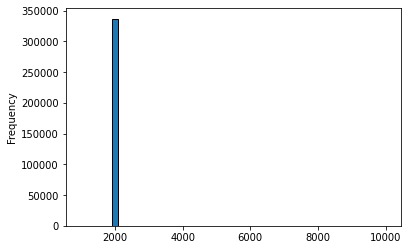

In [20]:
df.RegistrationYear.plot(kind='hist', ec='black', bins=50)

 Посмотрим на  максимальную дату скачивания анкеты автомобиля.

In [21]:
date = pd.to_datetime(df['DateCrawled'])
date.max()

Timestamp('2016-04-07 14:36:58')

Даты регистрации после 2016 года убираем и машины появились не раньше 1900 года. Отсечем ненужные года и промотрим левые выбросы.

count    323252.000000
mean       2002.676698
std           6.832694
min        1910.000000
25%        1999.000000
50%        2003.000000
75%        2007.000000
max        2016.000000
Name: RegistrationYear, dtype: float64

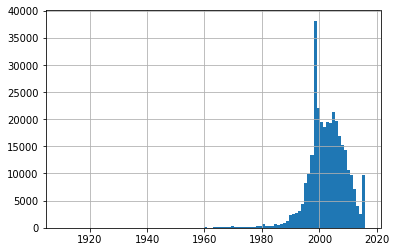

In [22]:
df = df.query('1899 < RegistrationYear < 2017')
df['RegistrationYear'].hist(bins=100)
df['RegistrationYear'].describe()

Похоже, что стоит использовать данные, начиная с 1960 года, может они уже и не работают, зато могут быть коллекционным

In [23]:
df = df.query('1959 < RegistrationYear < 2017')

In [24]:
#теперь можно удалить этот столбец
df = df.drop('DateCrawled', axis=1)

***

<AxesSubplot:ylabel='Frequency'>

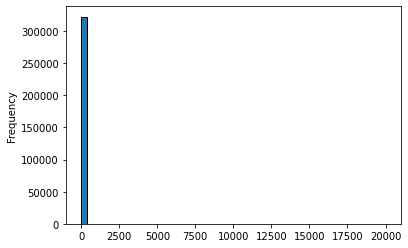

In [25]:
df.Power.plot(kind='hist', ec='black', bins=50)

Уберем аномально высокие значения мощности:  
можно смело убирать выше 500 л.с.

In [27]:
df = df.query('10 < Power < 500')

<AxesSubplot:ylabel='Frequency'>

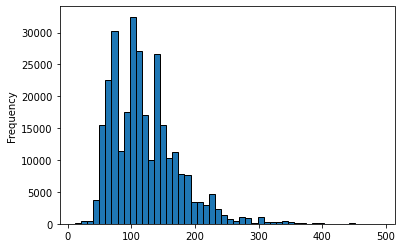

In [28]:
df.Power.plot(kind='hist', ec='black', bins=50)

***

### Проверка на дубликаты

In [29]:
df.duplicated().sum()

48011

Их достаточно много, но что поделать, придется удалить.

In [30]:
df = df.drop_duplicates()

***

### Корреляция

In [31]:
df.corr()

,Price,RegistrationYear,Power,Kilometer
Price,1.000000,0.476887,0.489674,-0.376385
RegistrationYear,0.476887,1.000000,0.110140,-0.285588
Power,0.489674,0.110140,1.000000,0.135864
Kilometer,-0.376385,-0.285588,0.135864,1.000000


Корреляция прослеживается между ценой и годом регистрации, мощностью, километражом, а также между годом и километражом

In [33]:
df

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
1,18300,coupe,2011,manual,190,golf,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,no
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
...,...,...,...,...,...,...,...,...,...,...
354361,5250,sedan,2016,auto,150,159,150000,petrol,alfa_romeo,no
354362,3200,sedan,2004,manual,225,leon,150000,petrol,seat,yes
354366,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no
354367,9200,bus,1996,manual,102,transporter,150000,gasoline,volkswagen,no


На этом изучение данных закончено.  

## Подготовка выборок

Подготовим выборки для обучения моделей.

Обучим разные модели, одна из которых — LightGBM, как минимум одна — не бустинг. Для каждой модели попробуем разные гиперпараметры.

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OrdinalEncoder
from catboost import Pool, CatBoostRegressor, cv
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Существующие данные мы делим на две выборки:

* обучающая 75% 
* тестовая 25% 

Поделим на features (признаки) и target (целевой признак):

In [35]:
df.isna().sum()

Price               0
VehicleType         0
RegistrationYear    0
Gearbox             0
Power               0
Model               0
Kilometer           0
FuelType            0
Brand               0
NotRepaired         0
dtype: int64

In [36]:
#Исходные принаки
features = df.drop('Price', axis=1)
#Целевой признак
target = df['Price']

#OHE кодирование -чтобы все признаки стали числовыми
ohe_features = pd.get_dummies(features, drop_first=True)


#Прямое кодирование - чтобы все признаки стали категориальными
encoder = OrdinalEncoder()
cat_columns = ['VehicleType','Gearbox','FuelType','Brand','Model','NotRepaired']
cat_features = features[cat_columns]
cat_features = pd.DataFrame(encoder.fit_transform(cat_features),
                                columns=cat_features.columns, 
                                index=cat_features.index)
ordinal_features = features.copy()
for column in cat_columns:
    ordinal_features[column] = cat_features[column]


In [37]:
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.25, random_state=12345)

ohe_features_train = ohe_features.loc[features_train.index, :]
ohe_features_test = ohe_features.loc[features_test.index, :]

ordinal_features_train = ordinal_features.loc[features_train.index, :]
ordinal_features_test = ordinal_features.loc[features_test.index, :]

display(features_train.shape)
print('Размер обучающей выборки', features_train.shape[0])
print('Размер тестовой выборки', features_test.shape[0])

(183195, 9)

Размер обучающей выборки 183195
Размер тестовой выборки 61065


<div class="alert alert-block alert-info">
    
<b>Данные неплохо было бы также масштабировать, особенно линейные модели это любят</b>

## Обучение моделей

### Решающее дерево

In [45]:
%%time

DTR = DecisionTreeRegressor(random_state = 12345)
parameters_grid = {'max_depth' : range(1,21)}
DTR_model = GridSearchCV(DTR, parameters_grid, cv=5, scoring = 'neg_root_mean_squared_error')
DTR_model.fit(ohe_features_train, target_train)
print("Best parameters:")
print(DTR_model.best_params_)
print("Best score:")
RMSE_DTR = DTR_model.best_score_*(-1)
print(DTR_model.best_score_*(-1))
 # Вернуться к оптимальной модели после поиска по сетке
best_estimator = DTR_model.best_estimator_ 
print()
print(DTR_model.best_estimator_)

Best parameters:
{'max_depth': 15}
Best score:
1928.356474392506

DecisionTreeRegressor(max_depth=15, random_state=12345)
CPU times: user 4min 11s, sys: 20.7 s, total: 4min 31s
Wall time: 4min 32s


In [71]:
pd.DataFrame(DTR_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.541222,0.007585,0.068483,0.000878,1,{'max_depth': 1},-3783.000707,-3749.266901,-3750.383118,-3707.753326,-3720.291081,-3742.139027,26.260836,20
1,0.781885,0.018992,0.068979,0.000721,2,{'max_depth': 2},-3290.557217,-3271.686040,-3287.376123,-3247.232994,-3242.015791,-3267.773633,20.020192,19
2,1.047005,0.013775,0.071160,0.001735,3,{'max_depth': 3},-3020.453671,-2996.333309,-3022.343142,-3000.625835,-2996.783244,-3007.307840,11.616624,18
3,1.310022,0.012448,0.069358,0.001963,4,{'max_depth': 4},-2692.158288,-2659.304133,-2673.951918,-2660.348825,-2649.792223,-2667.111077,14.702238,17
4,1.610091,0.028554,0.069907,0.000960,5,{'max_depth': 5},-2522.690219,-2481.498598,-2493.720755,-2471.935661,-2469.388162,-2487.846679,19.404909,16
5,1.903661,0.013367,0.071336,0.000865,6,{'max_depth': 6},-2356.218341,-2335.227564,-2335.198398,-2317.695188,-2303.894280,-2329.646754,17.742859,15
6,2.199362,0.053034,0.072738,0.000935,7,{'max_depth': 7},-2258.541712,-2232.662294,-2228.823714,-2213.512870,-2204.646779,-2227.637474,18.492184,14
7,2.409569,0.018488,0.073450,0.002672,8,{'max_depth': 8},-2172.500079,-2148.374558,-2134.758410,-2136.767982,-2116.483142,-2141.776834,18.447577,13
8,2.675417,0.049034,0.074410,0.003546,9,{'max_depth': 9},-2113.942421,-2090.926357,-2080.099428,-2075.781708,-2068.536104,-2085.857204,15.806099,12
9,2.766309,0.014509,0.072265,0.001240,10,{'max_depth': 10},-2069.646395,-2041.286436,-2026.738953,-2032.326706,-2017.074515,-2037.414601,17.930169,11


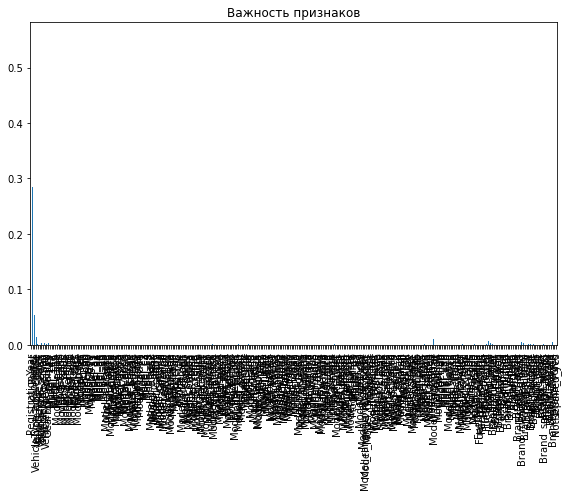

In [105]:
DR_imp = pd.Series(DTR_model.best_estimator_.feature_importances_,
                    ohe_features_train.columns)
fig, ax = plt.subplots(figsize=(8,7))
DR_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
fig.tight_layout()

### Случайный лес

In [49]:
%%time

RFR = RandomForestRegressor(random_state = 12345)
parameters_grid = {"max_depth": range(1,6),
                  "n_estimators": range(10,51,20)}
RFR_model = GridSearchCV(RFR, parameters_grid, cv=5, scoring = 'neg_root_mean_squared_error')
RFR_model.fit(ohe_features_train, target_train)

print("Best parameters:")
print(RFR_model.best_params_)
RMSE_RFR = RFR_model.best_score_*(-1)
print("Best score:")
print(RFR_model.best_score_*(-1))
 # Вернуться к оптимальной модели после поиска по сетке
best_estimator2 = RFR_model.best_estimator_ 
print()
print(RFR_model.best_estimator_)

Best parameters:
{'max_depth': 5, 'n_estimators': 50}
Best score:
2435.17716334085

RandomForestRegressor(max_depth=5, n_estimators=50, random_state=12345)
CPU times: user 20min 27s, sys: 17.2 s, total: 20min 44s
Wall time: 20min 44s


In [70]:
pd.DataFrame(RFR_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.788886,0.037888,0.075305,0.000817,1,10,"{'max_depth': 1, 'n_estimators': 10}",-3783.052203,-3749.228721,-3750.392723,-3707.775106,-3720.270880,-3742.143927,26.273066,14
1,4.630759,0.033281,0.088632,0.001325,1,30,"{'max_depth': 1, 'n_estimators': 30}",-3783.006132,-3749.264864,-3750.400376,-3707.797501,-3720.263442,-3742.146463,26.256539,15
2,7.437224,0.034397,0.098611,0.001357,1,50,"{'max_depth': 1, 'n_estimators': 50}",-3783.010062,-3749.264615,-3750.381531,-3707.764539,-3720.274427,-3742.139035,26.263360,13
3,3.495614,0.016812,0.076734,0.000616,2,10,"{'max_depth': 2, 'n_estimators': 10}",-3288.585726,-3269.313835,-3284.774968,-3244.883122,-3240.604300,-3265.632390,19.818095,12
4,9.923843,0.066158,0.094495,0.001774,2,30,"{'max_depth': 2, 'n_estimators': 30}",-3288.695973,-3269.346956,-3284.803938,-3244.493185,-3240.430297,-3265.554070,19.976266,10
5,16.350033,0.125011,0.109296,0.001314,2,50,"{'max_depth': 2, 'n_estimators': 50}",-3288.780980,-3269.465417,-3284.730781,-3244.475252,-3240.418160,-3265.574118,19.993313,11
6,5.455452,0.059878,0.077664,0.000580,3,10,"{'max_depth': 3, 'n_estimators': 10}",-2996.412703,-2992.055402,-3015.214582,-2993.501954,-2986.321779,-2996.701284,9.822215,9
7,15.833623,0.109544,0.099090,0.000446,3,30,"{'max_depth': 3, 'n_estimators': 30}",-3003.169330,-2989.156203,-3011.378038,-2991.609069,-2986.756492,-2996.413826,9.365761,8
8,26.135160,0.081605,0.121946,0.002605,3,50,"{'max_depth': 3, 'n_estimators': 50}",-3001.472972,-2983.295060,-3006.101722,-2991.951269,-2987.328903,-2994.029985,8.550896,7
9,7.603540,0.036428,0.081167,0.000729,4,10,"{'max_depth': 4, 'n_estimators': 10}",-2642.082477,-2638.190647,-2646.852814,-2635.769104,-2613.855373,-2635.350083,11.383364,5


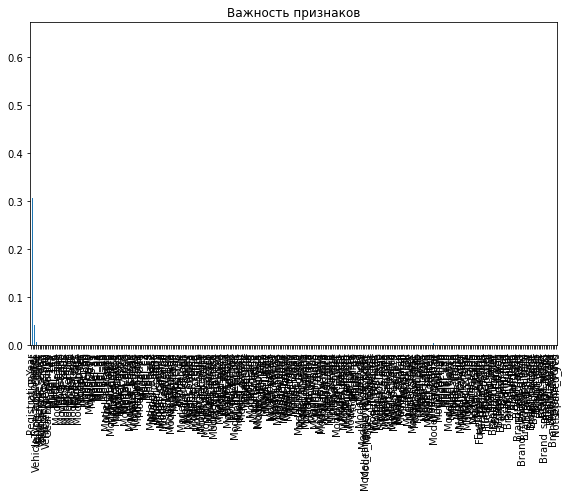

In [106]:
RF_imp = pd.Series(RFR_model.best_estimator_.feature_importances_,
                    ohe_features_train.columns)
fig, ax = plt.subplots(figsize=(8,7))
RF_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
fig.tight_layout()

### Линейная регрессия

In [53]:
%%time

LR = LinearRegression()
print('# Train for root_mean_squared_error')
print()
cv_RMSE_LR = (cross_val_score(LR, 
                             ohe_features_train, 
                             target_train, 
                             cv=5, 
                             scoring='neg_root_mean_squared_error').mean() * -1)
print('Mean RMSE from CV of LinearRegression =', cv_RMSE_LR)

# Train for root_mean_squared_error

Mean RMSE from CV of LinearRegression = 2678.33252366551
CPU times: user 47.7 s, sys: 16.6 s, total: 1min 4s
Wall time: 1min 4s


### CatBoostRegressor

Сделаем на исходным данных с указанием качественных столбцов.

In [57]:
%%time

CBR = CatBoostRegressor(learning_rate=0.5,
                        iterations = 200,
                        random_state=19072020, 
                        verbose=False, 
                        cat_features=['VehicleType','Gearbox','FuelType','Brand','Model','NotRepaired']) 
print('# Train for root_mean_squared_error')
print()
cv_RMSE_CBR = (cross_val_score(CBR,
                                features_train, 
                                target_train, 
                                cv=5, 
                                scoring='neg_root_mean_squared_error').mean() * -1) 
print('Mean RMSE from CV of CatBoostRegressor =', cv_RMSE_CBR)

# Train for root_mean_squared_error

Mean RMSE from CV of CatBoostRegressor = 1659.4976434729676
CPU times: user 1min 54s, sys: 555 ms, total: 1min 54s
Wall time: 1min 57s


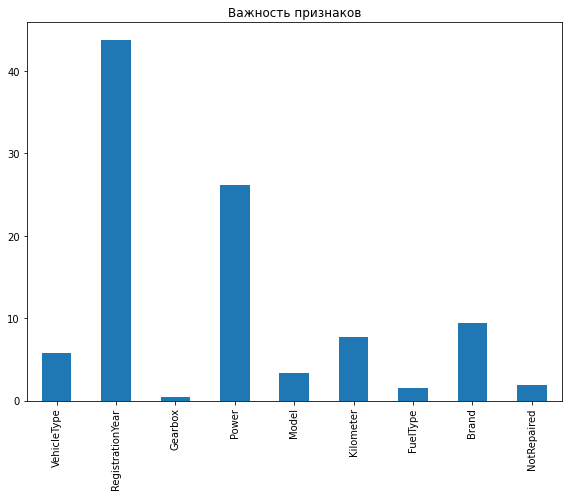

In [99]:
CBR_imp = pd.Series(CBR.feature_importances_,
                    features_train.columns)
fig, ax = plt.subplots(figsize=(8,7))
CBR_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
fig.tight_layout()

### LightGBM

In [61]:
%%time

LGBM = LGBMRegressor() 
parameters_grid = [{'num_leaves':[31, 100, 200], 
                'learning_rate':[0.1, 0.3, 0.5],
                'random_state':[12345]}]

print('# Tuning hyper-parameters for root_mean_squared_error')
print()
LGBM_model = GridSearchCV(LGBM, parameters_grid, scoring='neg_root_mean_squared_error')
LGBM_model.fit(ordinal_features_train, target_train)

print("Best parameters:")
print(LGBM_model.best_params_)
RMSE_LGBM = LGBM_model.best_score_*(-1)
print("Best score:")
print(LGBM_model.best_score_*(-1))
 # Вернуться к оптимальной модели после поиска по сетке
best_estimator3 = DTR_model.best_estimator_ 
print()
print(LGBM_model.best_estimator_)

# Tuning hyper-parameters for root_mean_squared_error

Best parameters:
{'learning_rate': 0.1, 'num_leaves': 200, 'random_state': 12345}
Best score:
1621.4811916495169

LGBMRegressor(num_leaves=200, random_state=12345)
CPU times: user 5min 3s, sys: 1.61 s, total: 5min 4s
Wall time: 5min 8s


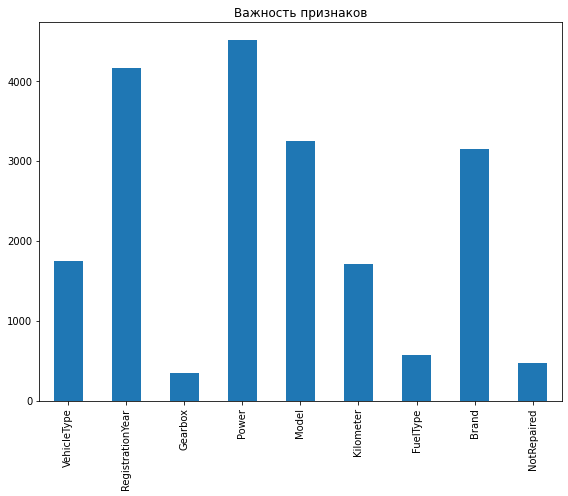

In [103]:
LGBM_imp = pd.Series(LGBM_model.best_estimator_.feature_importances_,
                    ordinal_features_train.columns)
fig, ax = plt.subplots(figsize=(8,7))
LGBM_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
fig.tight_layout()

# Вывод по шагу 2

Были изучены 5 регрессионных моделей. Зафиксированы лучшие гиперпараметры и время их выполнения.

По Дереву решений и рандомному лесу тяжело понять, какие признаки больше влияют, так как после кодирования их становится очень много.

По кэтбусту и LGBM можно сказать, что +- feature_importance совпадают, однако у первого больше всех влияют - год регистрации и мощность, а у второго - мощность, год регистации, модель и бренд.

## Анализ моделей

Проведем обучение на каждой модели с лучшими гиперпараметрами.

Также сделаем предсказание на тестовой выборке (т.к. нужно узнать время предсказания) и посчитаем качество модели.  
Хотя я считаю, что выбирать модель по результатам на тестовых данных это нечестно...:(

<div class="alert alert-block alert-success">
    
<b> Кросс-валидация успешно применена <br> Внутренний метод кодировки данных был использован</b>



<div class="alert alert-block alert-info">


<b>Что можно ещё улучшить</b> <br>
    
У нас разный возраст машин. Есть гипотеза, что для разных возрастов - своё ценообразование. Поэтому, можно попробовать ввести фактор "тип возраста" (ретро, супер-ретро, старая, новая... надо подумать..)..<br>


</div>


<div class="alert alert-block alert-danger">
    
<b></b> Выбрать наилучшую модель нужно не переходя к тестовой выборке, то есть метрики, которые интересуют заказчика, нужно получить на текущем шаге:
    
    качество предсказания;
    скорость предсказания;
    время обучения.
  
Проанализировать, а затем провести тестирование, используя 1 наилучшую модель.
    

<div class="alert alert-block alert-danger">

 1) На тестовой выборке не нужно считать метрики времени. Очень важно понять, что на тестовой выборке не выбирается никакая модель, тем более, используя метрики - все это делается до тестовой выборке для валидации. (тестовая выборка, только, чтобы получить объективную оценку качества выбранной модели и оценить всю проделанную до этого работу). <br> До этого момента мы работаем, настраиваем модели, получаем метрики для анализа, используя валидационную выборку либо кросс-валидационные методы. То есть нужно либо как ты сделала ниже оценить дополнительные метрики времени, спользуя валидационную выборку либо тренировочную:
    
    - время обучения =  model.fit(X_train/X_valid)
    - время предсказания  = model.predict(X_train/X_valid)
    
Либо вытащить эти данные из `grid_search.cv_results_` - там есть и метрики качества, и средняя скорость обучения, и средняя скорость предсказания. <br> 2) Необязательно нужно обучать заново выборку, grid_search содержит в себе информация о наилучшему наборе гиперпараметров, и при использовании `.predict()` будет использовать его. 

### Решающее дерево

In [46]:
%%time

DTR_model.fit(ohe_features_train, target_train)

CPU times: user 4min 12s, sys: 20.8 s, total: 4min 33s
Wall time: 4min 33s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=12345),
             param_grid={'max_depth': range(1, 21)},
             scoring='neg_root_mean_squared_error')

In [72]:
%%time

target_predict = DTR_model.predict(ohe_features_train)

CPU times: user 143 ms, sys: 191 ms, total: 334 ms
Wall time: 335 ms


In [73]:
final_RMSE_DTR = mean_squared_error(target_train, target_predict) ** 0.5  

### Случайный лес

In [50]:
%%time

RFR_model.fit(ohe_features_train, target_train)

CPU times: user 20min 38s, sys: 17.2 s, total: 20min 55s
Wall time: 20min 55s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12345),
             param_grid={'max_depth': range(1, 6),
                         'n_estimators': range(10, 51, 20)},
             scoring='neg_root_mean_squared_error')

In [81]:
%%time

target_predict = RFR_model.predict(ohe_features_train)

CPU times: user 611 ms, sys: 183 ms, total: 794 ms
Wall time: 805 ms


In [70]:
pd.DataFrame(RFR_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.788886,0.037888,0.075305,0.000817,1,10,"{'max_depth': 1, 'n_estimators': 10}",-3783.052203,-3749.228721,-3750.392723,-3707.775106,-3720.270880,-3742.143927,26.273066,14
1,4.630759,0.033281,0.088632,0.001325,1,30,"{'max_depth': 1, 'n_estimators': 30}",-3783.006132,-3749.264864,-3750.400376,-3707.797501,-3720.263442,-3742.146463,26.256539,15
2,7.437224,0.034397,0.098611,0.001357,1,50,"{'max_depth': 1, 'n_estimators': 50}",-3783.010062,-3749.264615,-3750.381531,-3707.764539,-3720.274427,-3742.139035,26.263360,13
3,3.495614,0.016812,0.076734,0.000616,2,10,"{'max_depth': 2, 'n_estimators': 10}",-3288.585726,-3269.313835,-3284.774968,-3244.883122,-3240.604300,-3265.632390,19.818095,12
4,9.923843,0.066158,0.094495,0.001774,2,30,"{'max_depth': 2, 'n_estimators': 30}",-3288.695973,-3269.346956,-3284.803938,-3244.493185,-3240.430297,-3265.554070,19.976266,10
5,16.350033,0.125011,0.109296,0.001314,2,50,"{'max_depth': 2, 'n_estimators': 50}",-3288.780980,-3269.465417,-3284.730781,-3244.475252,-3240.418160,-3265.574118,19.993313,11
6,5.455452,0.059878,0.077664,0.000580,3,10,"{'max_depth': 3, 'n_estimators': 10}",-2996.412703,-2992.055402,-3015.214582,-2993.501954,-2986.321779,-2996.701284,9.822215,9
7,15.833623,0.109544,0.099090,0.000446,3,30,"{'max_depth': 3, 'n_estimators': 30}",-3003.169330,-2989.156203,-3011.378038,-2991.609069,-2986.756492,-2996.413826,9.365761,8
8,26.135160,0.081605,0.121946,0.002605,3,50,"{'max_depth': 3, 'n_estimators': 50}",-3001.472972,-2983.295060,-3006.101722,-2991.951269,-2987.328903,-2994.029985,8.550896,7
9,7.603540,0.036428,0.081167,0.000729,4,10,"{'max_depth': 4, 'n_estimators': 10}",-2642.082477,-2638.190647,-2646.852814,-2635.769104,-2613.855373,-2635.350083,11.383364,5


In [77]:
final_RMSE_RFR = mean_squared_error(target_train, target_predict) ** 0.5  

### Линейная регрессия

In [54]:
%%time

model = LinearRegression()
model.fit(ohe_features_train, target_train)

CPU times: user 12 s, sys: 3.29 s, total: 15.3 s
Wall time: 15.3 s


LinearRegression()

In [55]:
%%time

target_predict = model.predict(ohe_features_train)

CPU times: user 413 ms, sys: 248 ms, total: 662 ms
Wall time: 600 ms


In [56]:
final_RMSE_LR = mean_squared_error(target_train, target_predict) ** 0.5

### CatBoostRegressor

In [85]:
%%time

CBR = CatBoostRegressor(learning_rate=0.5, 
                          iterations = 200, 
                          random_state=12345, 
                          verbose=False,
                          cat_features=['VehicleType','Gearbox','FuelType','Brand','Model','NotRepaired']) 
CBR.fit(features_train, target_train)

CPU times: user 30.4 s, sys: 262 ms, total: 30.7 s
Wall time: 31.7 s


In [86]:
%%time

target_predict = CBR.predict(features_train)

CPU times: user 529 ms, sys: 7.82 ms, total: 537 ms
Wall time: 539 ms


In [87]:
final_RMSE_CBR = mean_squared_error(target_train, target_predict) ** 0.5

### LightGBM

In [62]:
%%time

model = LGBMRegressor(learning_rate=0.1, 
                      num_leaves=200, 
                      random_state=12345)
model.fit(ordinal_features_train, target_train)

CPU times: user 24.9 s, sys: 149 ms, total: 25 s
Wall time: 25.4 s


LGBMRegressor(num_leaves=200, random_state=12345)

In [63]:
%%time

target_predict = model.predict(ordinal_features_train)

CPU times: user 2.21 s, sys: 2.39 ms, total: 2.21 s
Wall time: 2.21 s


In [64]:
final_RMSE_LGBMR = mean_squared_error(target_train, target_predict) ** 0.5

## Сравнение моделей

In [92]:
index = ['DecisionTree',
         'RandomForest',
         'LinearRegression',
         'CatBoost',
         'LightGBM']
data = {'RMSE при поиске лучших гиперпараметров':[RMSE_DTR,
                                     RMSE_RFR,
                                     cv_RMSE_LR,
                                     cv_RMSE_CBR,
                                     RMSE_LGBM],
        'Время поиска лучших гиперпараметров, сек':[272,
                               1244,
                               64,
                               117,
                               308],
        'RMSE модели на обучающей выборке':[final_RMSE_DTR,
                                           final_RMSE_RFR,
                                           final_RMSE_LR,
                                           final_RMSE_CBR,
                                           final_RMSE_LGBMR],
        'Время обучения модели, сек':[273,
                                      1255,
                                      15.3,
                                      28.8,
                                      25.4],
        'Время предсказания модели, сек':[0.649,
                                          0.805,
                                          0.600,
                                          0.524,
                                          2.21]}

scores_data = pd.DataFrame(data=data, index=index)

In [93]:
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)

scores_data.style.background_gradient(cmap=cm)

,RMSE при поиске лучших гиперпараметров,"Время поиска лучших гиперпараметров, сек",RMSE модели на обучающей выборке,"Время обучения модели, сек","Время предсказания модели, сек"
DecisionTree,1928.356474,272,1536.977085,273.000000,0.649000
RandomForest,2435.177163,1244,2436.995453,1255.000000,0.805000
LinearRegression,2678.332524,64,2672.705505,15.300000,0.600000
CatBoost,1659.497643,117,1662.610018,28.800000,0.524000
LightGBM,1621.481192,308,1478.006106,25.400000,2.210000


In [94]:
scores_data.style.bar(color= 'coral',align = 'mid',)

,RMSE при поиске лучших гиперпараметров,"Время поиска лучших гиперпараметров, сек",RMSE модели на обучающей выборке,"Время обучения модели, сек","Время предсказания модели, сек"
DecisionTree,1928.356474,272,1536.977085,273.000000,0.649000
RandomForest,2435.177163,1244,2436.995453,1255.000000,0.805000
LinearRegression,2678.332524,64,2672.705505,15.300000,0.600000
CatBoost,1659.497643,117,1662.610018,28.800000,0.524000
LightGBM,1621.481192,308,1478.006106,25.400000,2.210000


## Проверка на тестовой выборке

Лучшей моделью по времени обучения, RMSE и времени предсказания модели является CatBoost.  
Однако, лучшим результатом RMSE обладает LightGBM, но время предсказания самое большое (хоть и не большое в абсолютных величинах).

In [89]:
%%time

target_predict = CBR.predict(features_test)

CPU times: user 186 ms, sys: 66 µs, total: 186 ms
Wall time: 184 ms


In [90]:
final_RMSE_CBR = mean_squared_error(target_test, target_predict) ** 0.5

In [91]:
final_RMSE_CBR

1662.6100181682787

## Общий вывод

* Данные были открыты, предобработаны.   
* У 5 моделей были подобраны лучшие гиперпараметры.
* Проверены время обучения и предсказания.


<b>Лучшей моделью я выбрала DecisionTreeRegressor</b>, т.к. у него RMSE в обоих случаях меньше 2000 и лучшее время обучения и предсказания.

RandomForest и LinearRegression показали себя хуже всех по RMSE.

Также отмечу, что LightGBM показал лучшие значения RMSE хоть и за более долгое время.

<b>Проверили значение RMSE на тестовой выборке, используя модель CatBoost.</b>  
Получиллось значение 1662, что говорит о хорошем предсказании (меньше 2500).


## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей